In [1]:
!pip install prophet

In [7]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [3]:
df = pd.read_csv("/content/example_pedestrians_covid.csv")
df

,ds,y
0,2017-06-02,39230
1,2017-06-03,35290
2,2017-06-04,27083
3,2017-06-05,28727
4,2017-06-06,30315
...,...,...
1485,2021-06-26,24807
1486,2021-06-27,21738
1487,2021-06-28,21728
1488,2021-06-29,23561


In [4]:
df.head()

,ds,y
0,2017-06-02,39230
1,2017-06-03,35290
2,2017-06-04,27083
3,2017-06-05,28727
4,2017-06-06,30315


In [5]:
df.tail()

,ds,y
1485,2021-06-26,24807
1486,2021-06-27,21738
1487,2021-06-28,21728
1488,2021-06-29,23561
1489,2021-06-30,24572


In [8]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a4_iuxf/2ooa1u8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a4_iuxf/snbgrizf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37869', 'data', 'file=/tmp/tmp5a4_iuxf/2ooa1u8u.json', 'init=/tmp/tmp5a4_iuxf/snbgrizf.json', 'output', 'file=/tmp/tmp5a4_iuxf/prophet_modellewkafk9/prophet_model-20240120064208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:42:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
future_dates = model.make_future_dataframe(periods=365)
future_dates

,ds
0,2017-06-02
1,2017-06-03
2,2017-06-04
3,2017-06-05
4,2017-06-06
...,...
1850,2022-06-26
1851,2022-06-27
1852,2022-06-28
1853,2022-06-29


In [10]:
prediction = model.predict(future_dates)

In [11]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-02,35751.803500,28760.177502,40911.780609,35751.803500,35751.803500,-734.657172,-734.657172,-734.657172,4204.816821,4204.816821,4204.816821,-4939.473993,-4939.473993,-4939.473993,0.0,0.0,0.0,35017.146328
1,2017-06-03,35750.271751,26875.261171,38857.973133,35750.271751,35750.271751,-2696.147181,-2696.147181,-2696.147181,2369.950574,2369.950574,2369.950574,-5066.097755,-5066.097755,-5066.097755,0.0,0.0,0.0,33054.124570
2,2017-06-04,35748.740002,21085.520111,32843.081621,35748.740002,35748.740002,-8543.307843,-8543.307843,-8543.307843,-3382.484163,-3382.484163,-3382.484163,-5160.823681,-5160.823681,-5160.823681,0.0,0.0,0.0,27205.432159
3,2017-06-05,35747.208253,22360.922190,34687.026900,35747.208253,35747.208253,-7271.315797,-7271.315797,-7271.315797,-2050.930449,-2050.930449,-2050.930449,-5220.385348,-5220.385348,-5220.385348,0.0,0.0,0.0,28475.892456
4,2017-06-06,35745.676504,23187.708311,35024.346764,35745.676504,35745.676504,-6704.016411,-6704.016411,-6704.016411,-1461.742762,-1461.742762,-1461.742762,-5242.273649,-5242.273649,-5242.273649,0.0,0.0,0.0,29041.660093


In [12]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-06-02,35017.146328,28760.177502,40911.780609
1,2017-06-03,33054.124570,26875.261171,38857.973133
2,2017-06-04,27205.432159,21085.520111,32843.081621
3,2017-06-05,28475.892456,22360.922190,34687.026900
4,2017-06-06,29041.660093,23187.708311,35024.346764


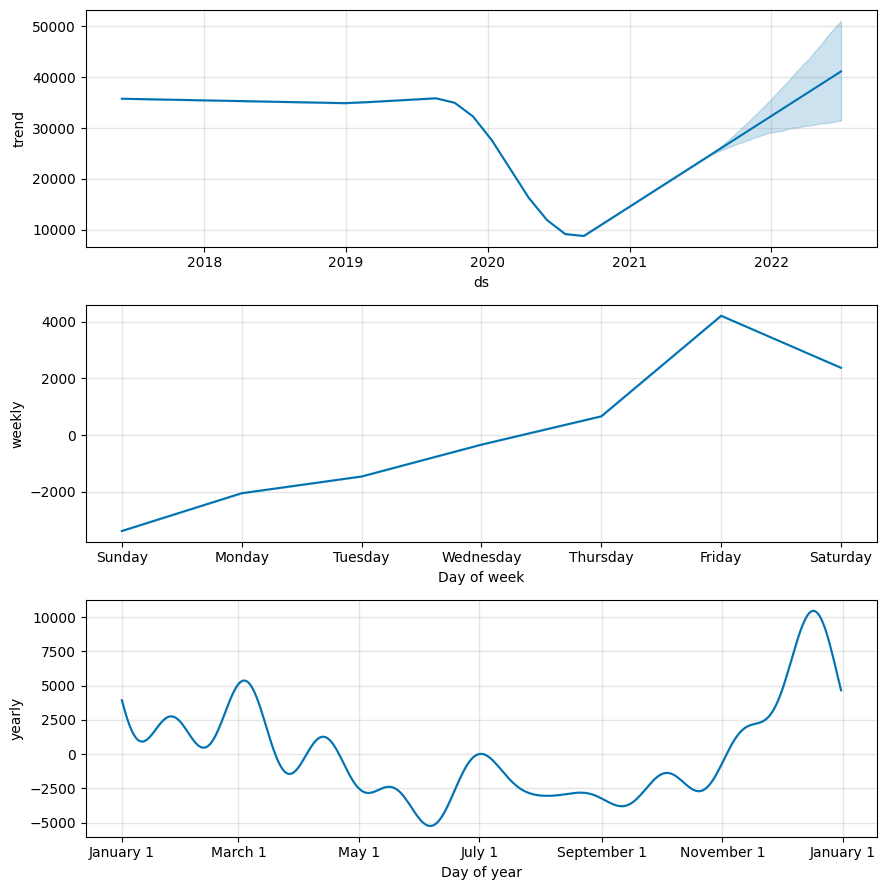

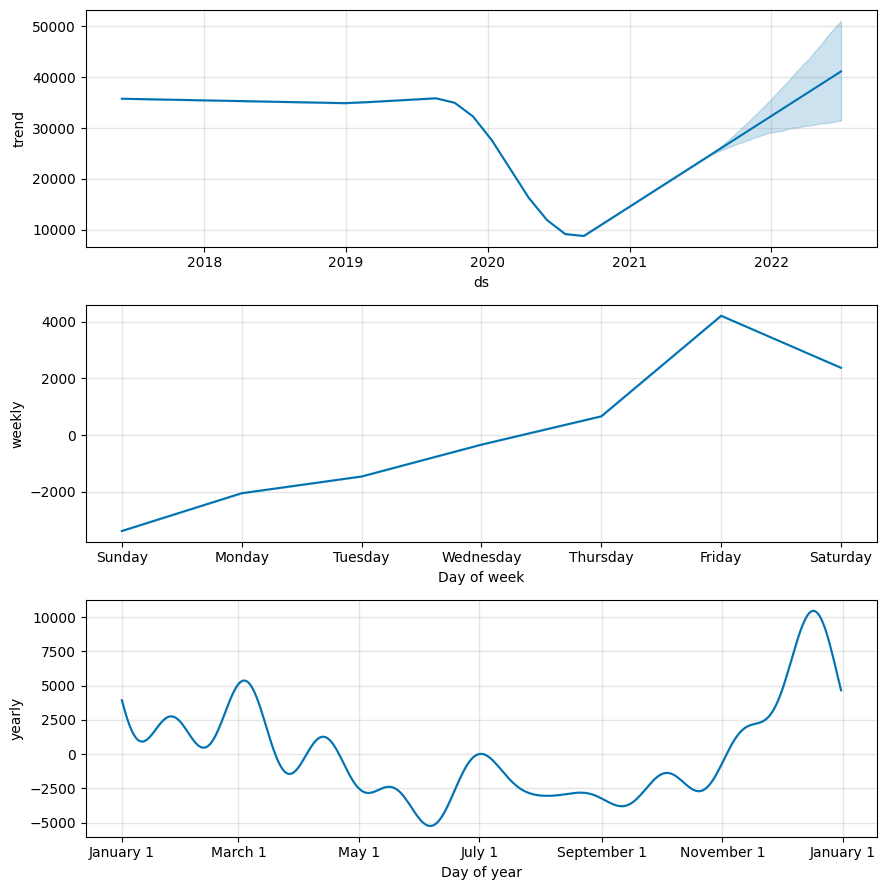

In [13]:
model.plot_components(prediction)

In [14]:
from prophet.diagnostics import cross_validation

In [15]:
df_cv = cross_validation(model,horizon='365 days', period='180 days', initial='1095 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2020-06-30 00:00:00 and 2020-06-30 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a4_iuxf/z7z9c0l7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a4_iuxf/bz8fjmrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16401', 'data', 'file=/tmp/tmp5a4_iuxf/z7z9c0l7.json', 'init=/tmp/tmp5a4_iuxf/bz8fjmrf.json', 'output', 'file=/tmp/tmp5a4_iuxf/prophet_model_vdwp_l8/prophet_model-20240120064333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:43:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-01,7771.170003,1790.924130,13533.920328,13008,2020-06-30
1,2020-07-02,8967.622928,2792.838893,14587.168889,12753,2020-06-30
2,2020-07-03,12970.946569,7929.516764,18811.164401,11274,2020-06-30
3,2020-07-04,9971.832940,4413.805844,16219.653539,11802,2020-06-30
4,2020-07-05,3512.768071,-2238.318270,9265.272219,9167,2020-06-30


In [17]:
from prophet.diagnostics import performance_metrics
performance = performance_metrics(df_cv)
performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,1.435455e+07,3788.739486,3363.269138,0.555291,0.493239,0.756286,0.916667
1,37 days,1.359568e+07,3687.232178,3226.812140,0.547373,0.493239,0.745753,0.916667
2,38 days,1.363586e+07,3692.675880,3231.991076,0.582547,0.510366,0.760443,0.916667
3,39 days,1.359874e+07,3687.646608,3219.362933,0.592933,0.517660,0.768095,0.916667
4,40 days,1.423430e+07,3772.837475,3310.789101,0.648075,0.530782,0.818981,0.916667


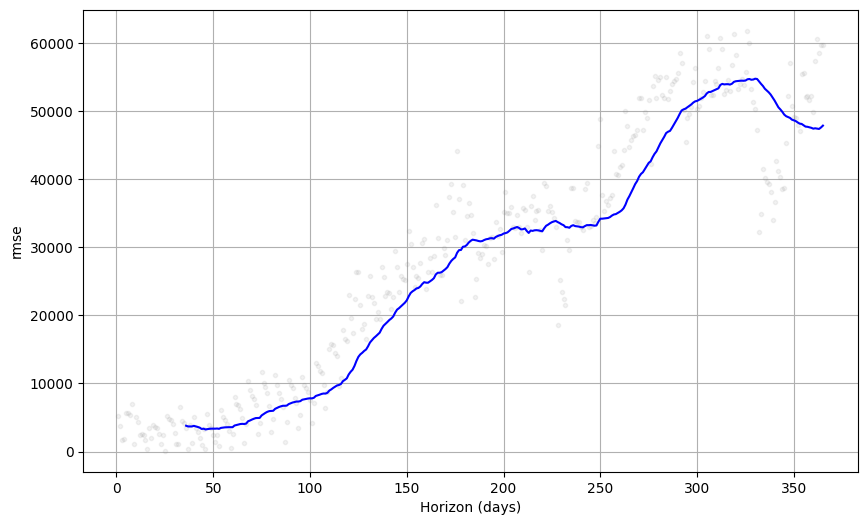

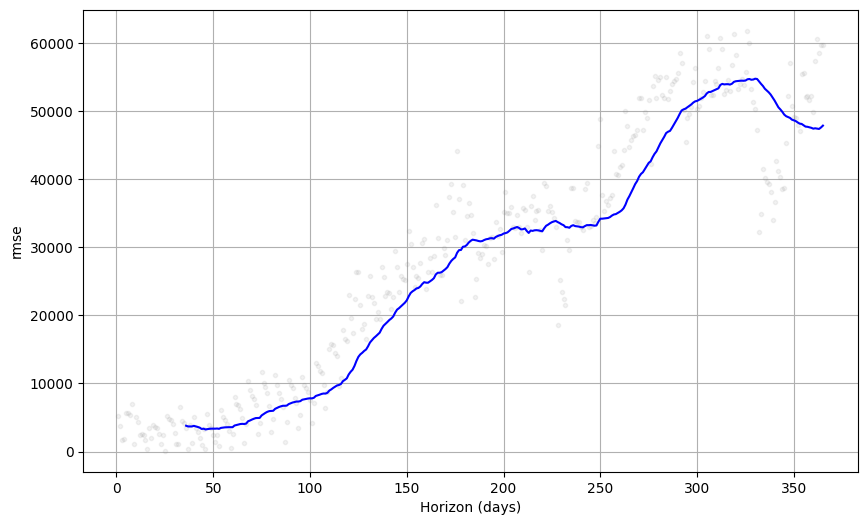

In [18]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='rmse')

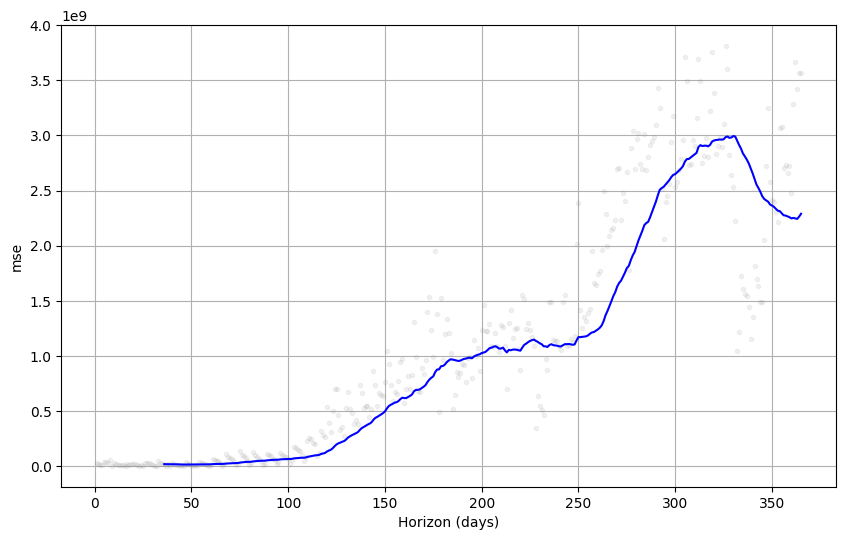

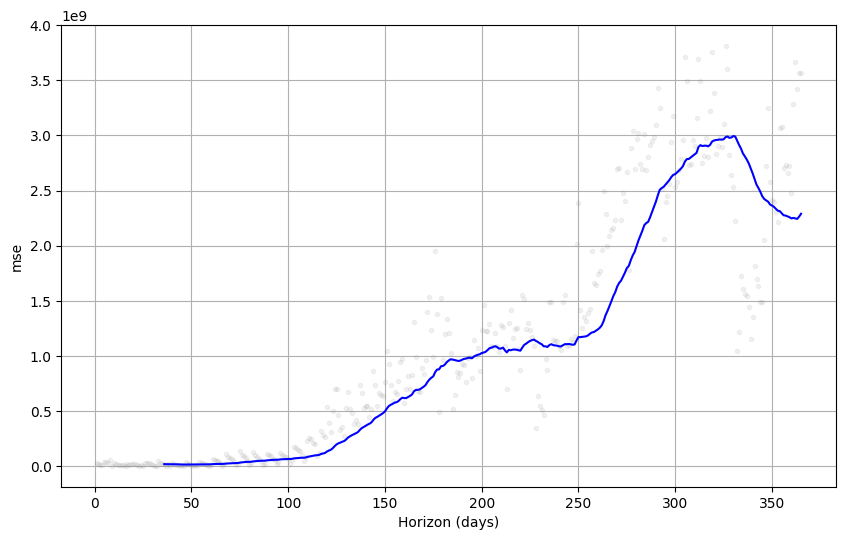

In [19]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='mse')

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model,prediction)

In [22]:
plot_components_plotly(model,prediction)